In [1]:
import warnings
warnings.filterwarnings('ignore')

Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Read csv file

In [3]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 Output column is the dependent variable whereas the rest are independent variables.

Check for null/NA values in the dataset

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

As there are no null/NA values, obtain random sample from the data to get and understanding of all the columns

In [5]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


Perform basic summary statistical analysis on numerical values in the dataframe.

In [6]:
df.drop(['sex', 'output', 'fbs', 'restecg', 'exng'], axis = 1).describe()

,age,cp,trtbps,chol,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000


As observed numerical columns such as age,chol do not have the same mean and median values indicating that the data is not symmetric. We obtain a graphical representation for the same below.

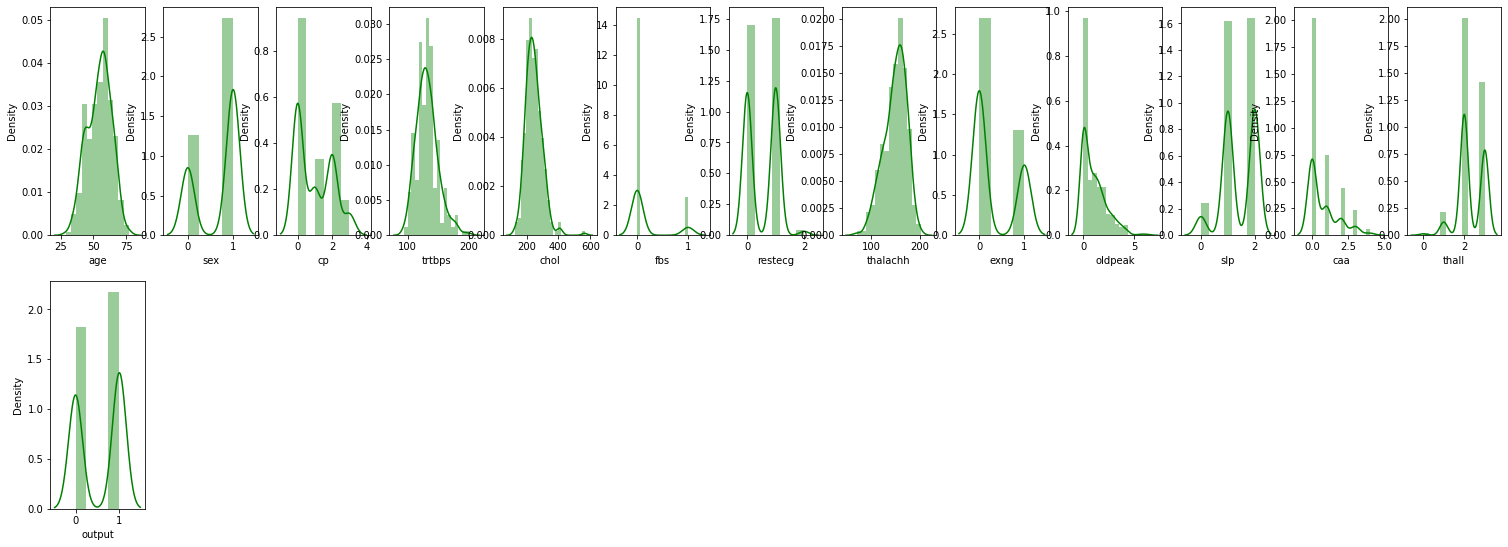

In [7]:
l = df.columns.values
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(df.columns.values)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],color='green',kde=True) 

In [8]:
df['output'].unique()

array([1, 0])

Plot heatmap to understand correlation

<AxesSubplot:>

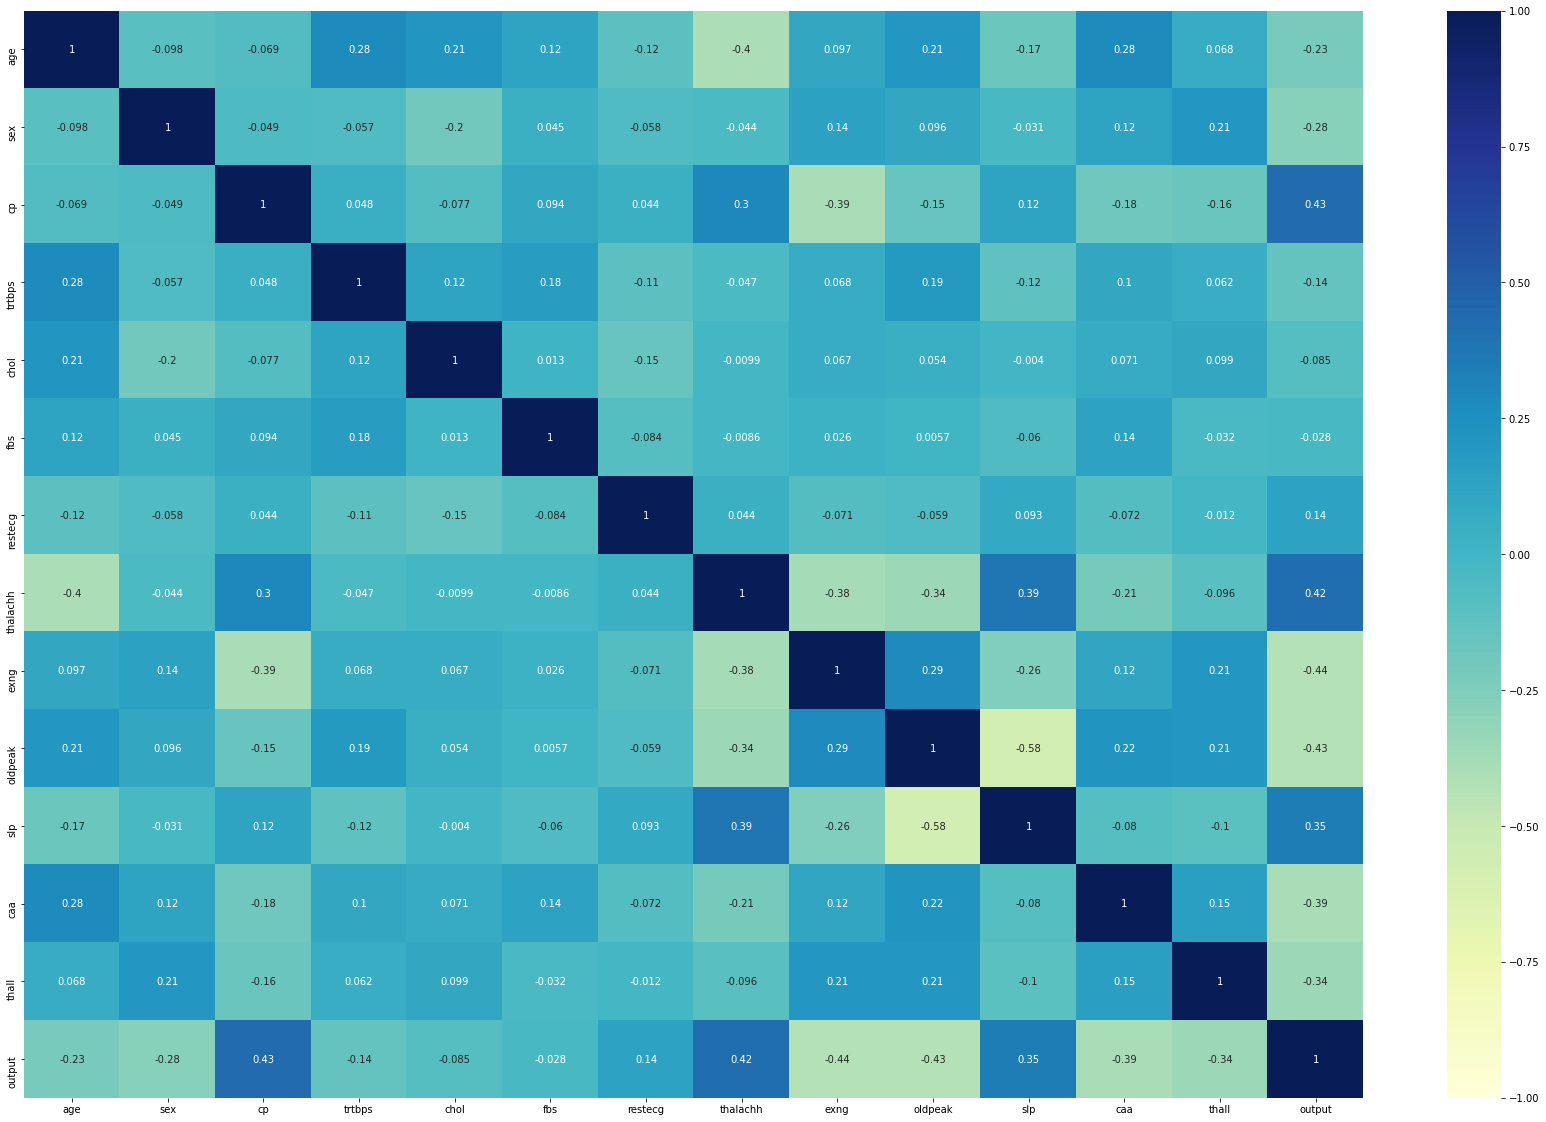

In [9]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", vmin=-1, vmax=1)

Darker the colour of the grid, higher the correlation between variables and vice versa.
In this case, the goal would be to remove variables that are strongly correlated (both positive and negative). This value for this analysis is set at -0.7/+0.7. As no variables show this correlation, all are considered for further analysis.

Plot Boxplot to observe outliers

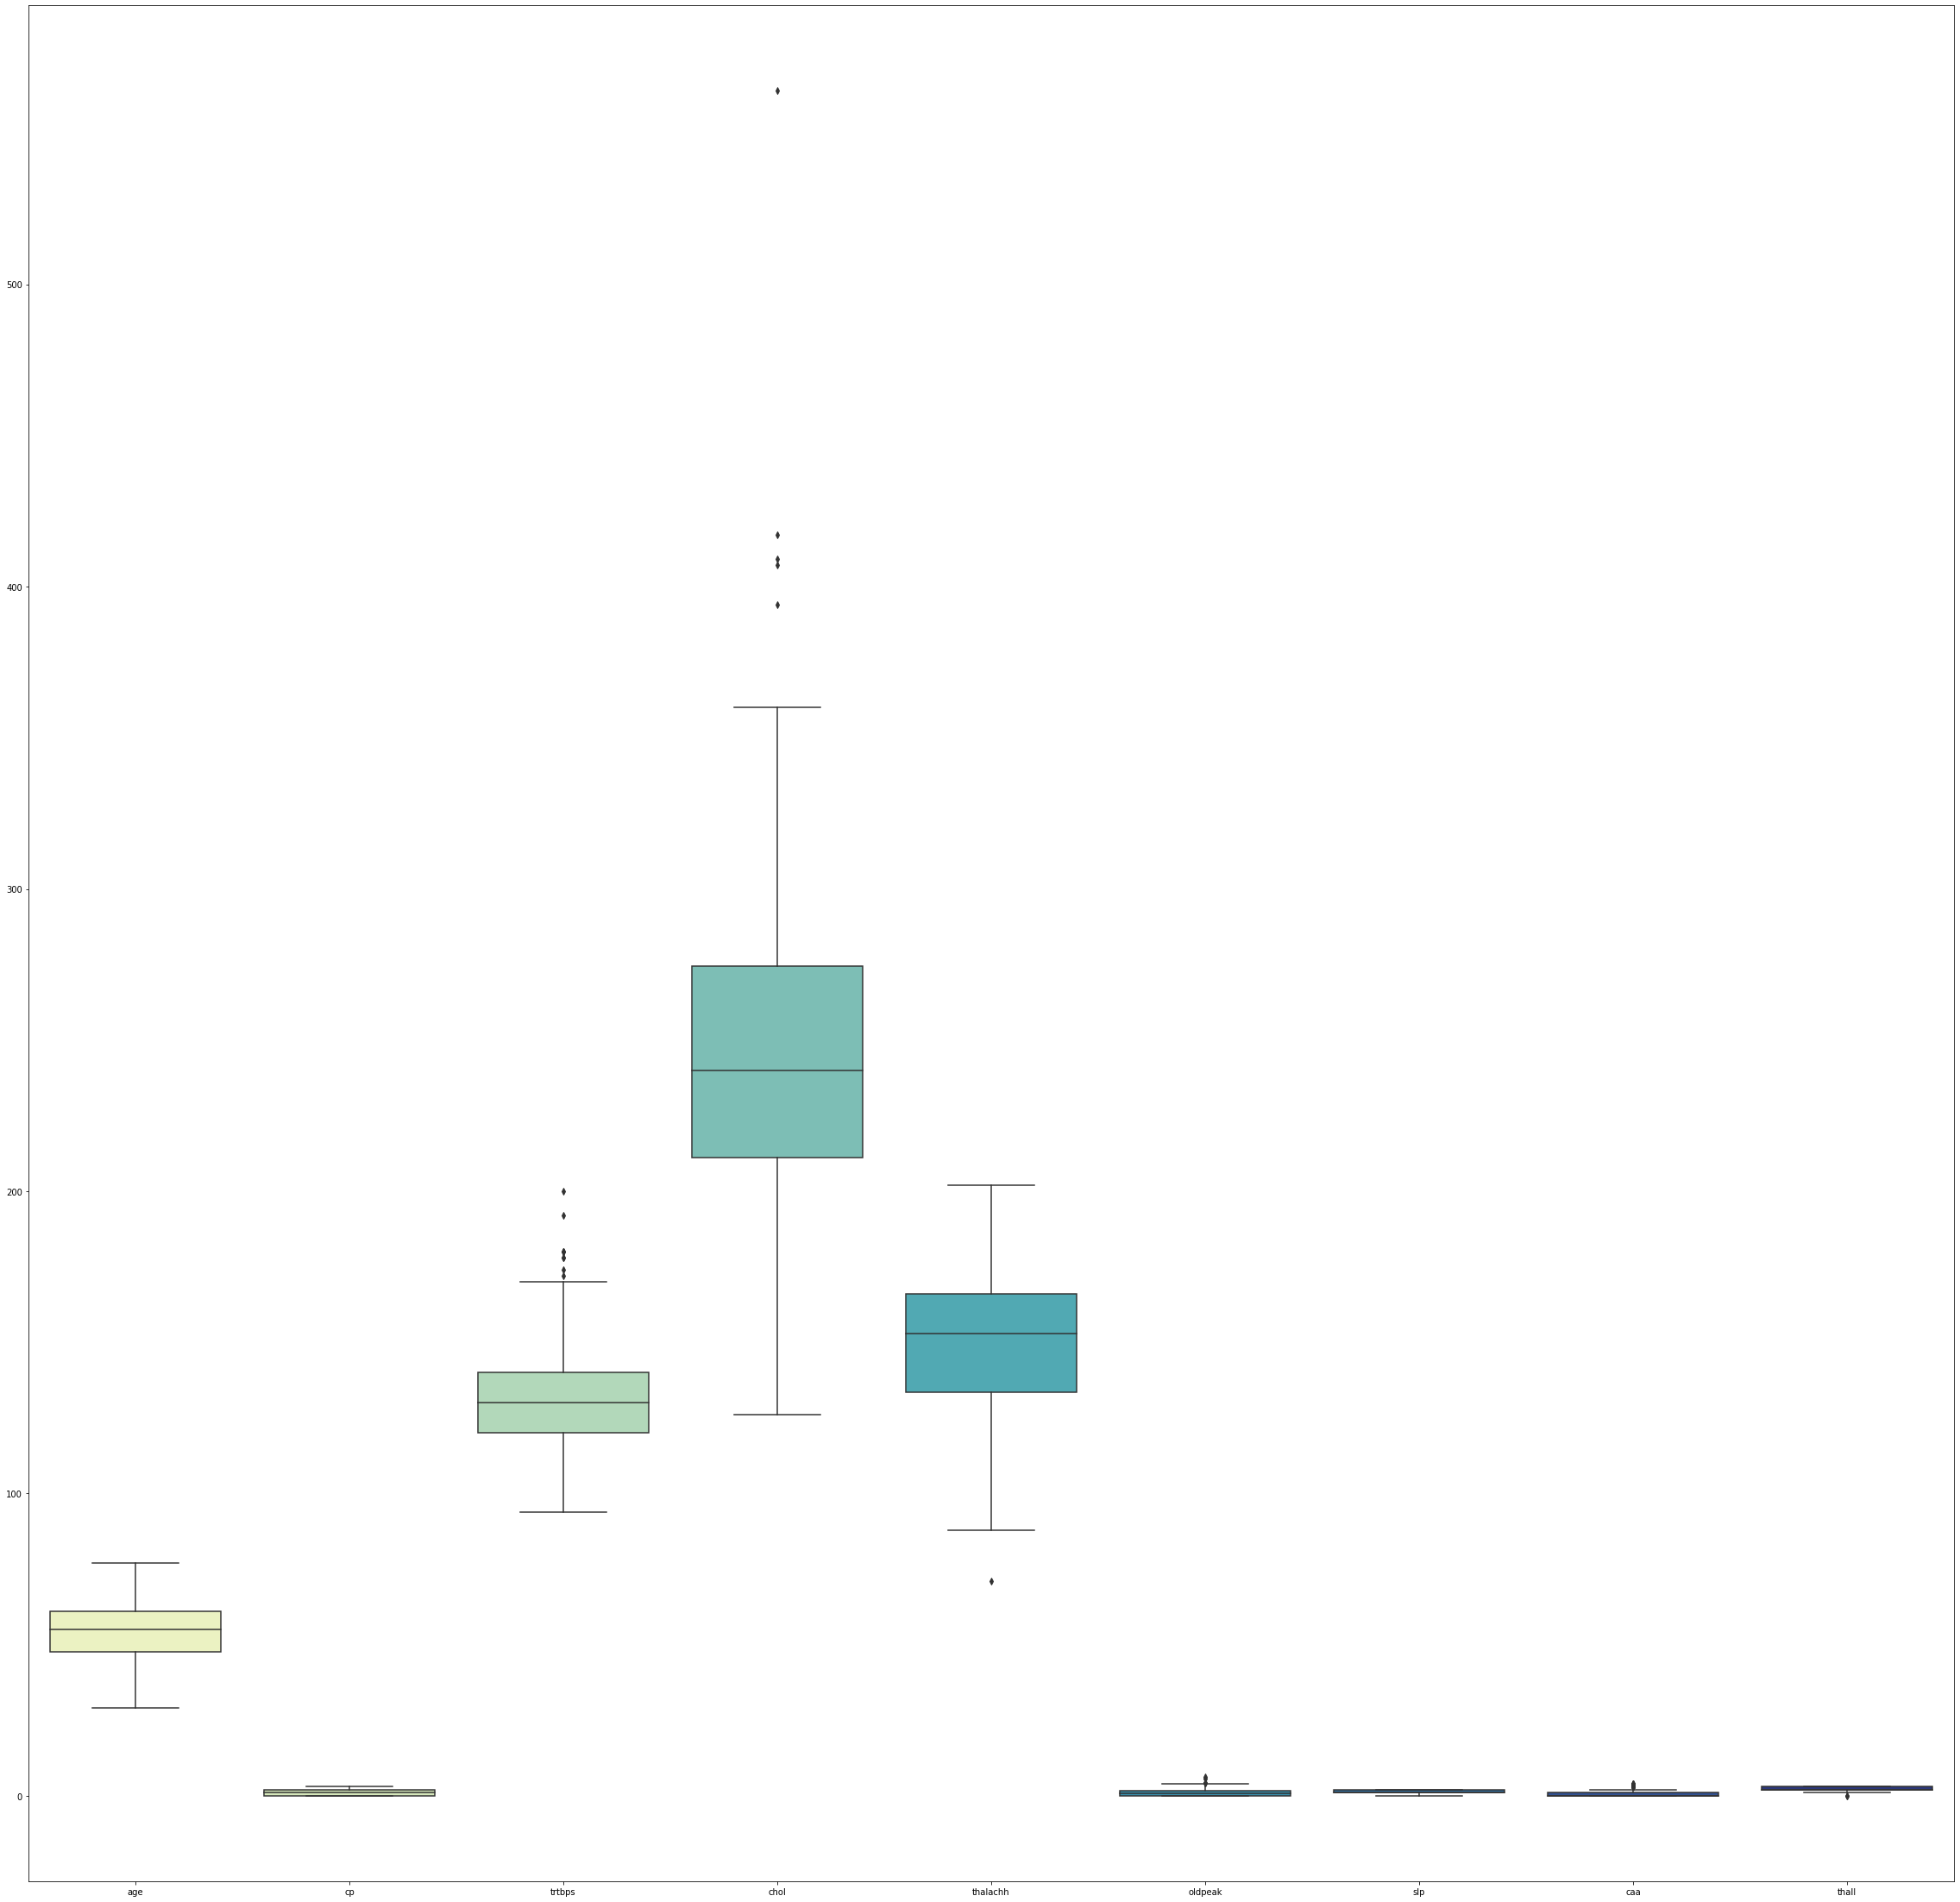

In [10]:
plt.figure(figsize=(40, 40))

ax = sns.boxplot(data=df.drop(['sex', 'output', 'fbs', 'restecg', 'exng'], axis = 1),palette="YlGnBu")


In [11]:
X = df.drop('output', axis = 1)
y = df.output
X = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=10)

Identifying base model accuracy score with logistic regression

In [12]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [14]:
model.score(X_test, y_test)

0.7704918032786885

In [15]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[26,  9],
       [ 5, 21]])

In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

